#**Challenge Telecom X: análisis de evasión de clientes - Parte 2**

##**🛠️ Preparación de los Datos**

In [1]:
# Importacion de librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

###**✅ 1. Extracción del Archivo Tratado**

---

Carga el archivo CSV que contiene los datos tratados anteriormente.

📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

---

In [2]:
# 1. Cargamos el archivo CSV tratado previamente
df = pd.read_csv('/content/TelecomX_Datos_Tratados.csv')

###**✅ 2. Eliminación de Columnas Irrelevantes**

---

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

---



In [3]:
# Eliminamos identificadores únicos o columnas irrelevantes para la predicción
df = df.drop(columns=[col for col in df.columns if col.lower() == 'customerid'], errors='ignore')

###**✅ 3. Transformación de variables categóricas (One-Hot Encoding)**

In [4]:
# Identificamos variables categóricas
columnas_categoricas = ['Genero', 'TipoInternet', 'TipoContrato', 'MetodoPago']

# Aplicamos One-Hot Encoding (sin duplicar la primera categoría para evitar multicolinealidad)
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

###**✅ 4. Separar variable objetivo (y) y variables predictoras (X)**

In [5]:
# Definimos X e y
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

###**✅ 5. Análisis del desbalance de clases**

Proporción original:
Churn
0    73.42
1    26.58
Name: proportion, dtype: float64


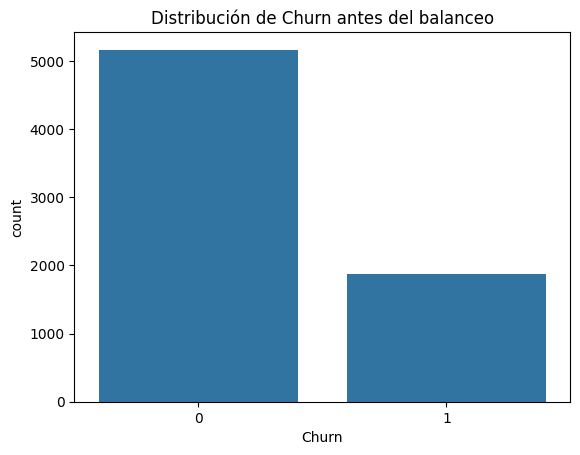

In [6]:
# Calculamos la proporción de cancelaciones vs no cancelaciones
proporcion_original = y.value_counts(normalize=True) * 100
print("Proporción original:")
print(proporcion_original.round(2))

# Visualizamos
sns.countplot(x=y)
plt.title("Distribución de Churn antes del balanceo")
plt.show()

###**✅ 6. Balanceo de clases con SMOTE (Oversampling)**

Distribución después de SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


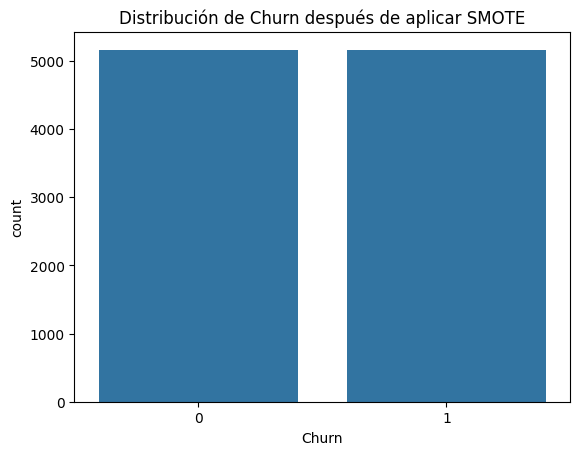

In [7]:
# Aplicamos SMOTE para balancear la clase minoritaria
smote = SMOTE(random_state=42)

# Fill missing values with the mean of each column
X_filled = X.fillna(X.mean())

# Apply SMOTE to the filled data
X_bal, y_bal = smote.fit_resample(X_filled, y)

# Revisión del nuevo balance
print("Distribución después de SMOTE:")
print(y_bal.value_counts())

# Visualizamos
sns.countplot(x=y_bal)
plt.title("Distribución de Churn después de aplicar SMOTE")
plt.show()

###**✅ 7. Estandarización de variables numéricas** **texto en negrita**

In [8]:
# Identificamos columnas numéricas
columnas_numericas = ['MesesCliente', 'CargosMensuales', 'TotalGastado', 'CargosDiarios']

# Escalamos estas columnas con StandardScaler
scaler = StandardScaler()
X_bal[columnas_numericas] = scaler.fit_transform(X_bal[columnas_numericas])

##**✅ 8. Validación de balanceo final**

In [9]:
proporcion_balanceada = y_bal.value_counts(normalize=True) * 100
print("Proporción después del balanceo:")
print(proporcion_balanceada.round(2))

Proporción después del balanceo:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


# **🎯 Correlación y Selección de Variables**

##**✅ 1. Análisis de Correlación**

---

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

---


In [10]:
# Configurar estilo global de los gráficos
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.autolayout"] = True

In [12]:
# 1. Limpieza básica (eliminar identificadores si aún existen)
# -------------------------
df.drop(columns=[col for col in df.columns if col.lower() == 'customerid'], inplace=True, errors='ignore')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


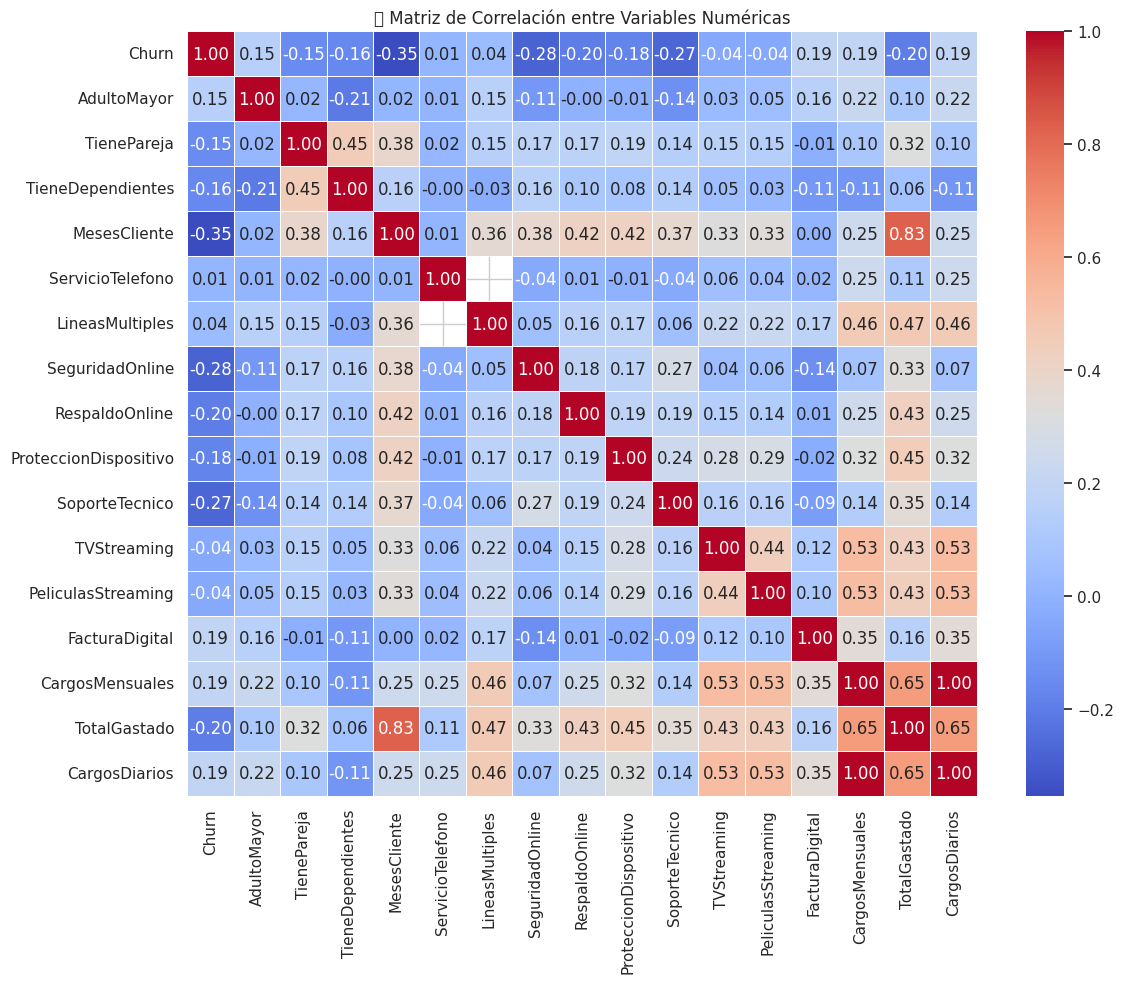

In [13]:
# 🔍 2. Matriz de Correlación - Variables Numéricas
# -------------------------
# Calculamos la matriz de correlación solo para columnas numéricas
correlation_matrix = df.corr(numeric_only=True)

# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔗 Matriz de Correlación entre Variables Numéricas")
plt.show()


##**✅ 2. Análisis Dirigido**

---

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

---

Text(0, 0.5, 'Total Gastado')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


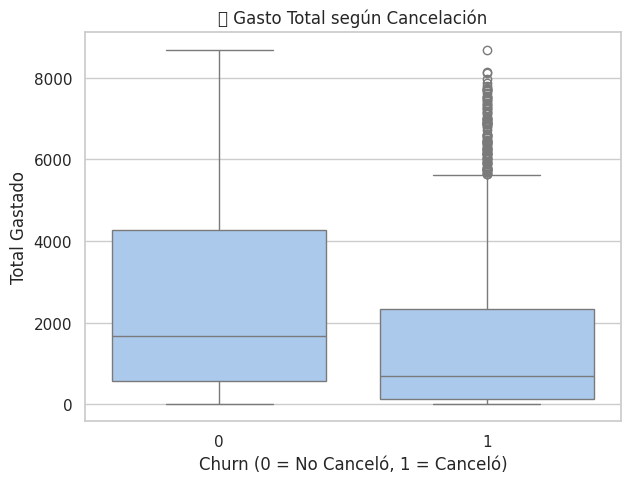

In [14]:
#📦 1. Análisis dirigido: Boxplots (Gasto Total y Meses como Cliente vs Churn)
# -------------------------

# Creamos una figura con 2 gráficos tipo boxplot
plt.figure(figsize=(12, 5))

# 📌 Gráfico 1: TotalGastado vs Churn
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='TotalGastado')
plt.title("💰 Gasto Total según Cancelación")
plt.xlabel("Churn (0 = No Canceló, 1 = Canceló)")
plt.ylabel("Total Gastado")

/tmp/ipython-input-4198432814.py:8: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


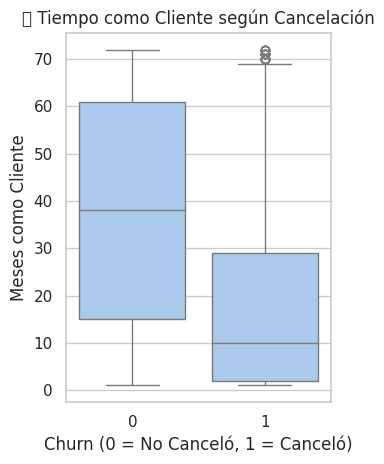

In [15]:
# 📌 Gráfico 2: MesesCliente vs Churn
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='MesesCliente')
plt.title("⏳ Tiempo como Cliente según Cancelación")
plt.xlabel("Churn (0 = No Canceló, 1 = Canceló)")
plt.ylabel("Meses como Cliente")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


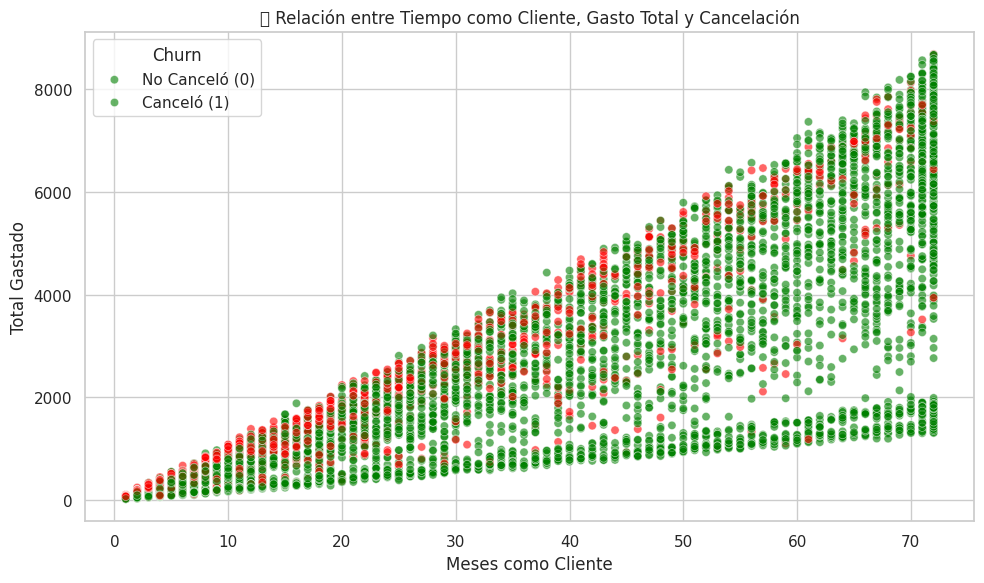

In [16]:
#🌐 3. Relación entre Tiempo, Gasto y Cancelación (Scatter Plot)
# -------------------------

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='MesesCliente',
    y='TotalGastado',
    hue='Churn',
    palette={0: "green", 1: "red"},
    alpha=0.6
)

plt.title("📉 Relación entre Tiempo como Cliente, Gasto Total y Cancelación")
plt.xlabel("Meses como Cliente")
plt.ylabel("Total Gastado")
plt.legend(title="Churn", labels=["No Canceló (0)", "Canceló (1)"])
plt.grid(True)
plt.show()